In [1]:
from conduct_csc import*;
from visualize import*;
from pickless import*;
from load_dataset import*;
from scipy import sparse;

In [2]:
def make_option():
    opt = {};
    # 訓練画像の枚数
    opt['train_amount'] = 100;
    # テスト画像の枚数
    opt['test_amount'] = 100;
    # フィルタのサイズ
    opt['d_size'] = [(5, 5, 6), (5, 5, 6, 16)];
    # スパースの尺度
    opt['lmbda'] = [0.5, 0.025];
    # 繰り返し回数
    opt['Iter'] = [200, 200];
    return opt;

load_mnist_train: return following shape arrays
imgs: (100, 32, 32)
labels: (100,)
Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D     
--------------------------------------------------------------------------------------------------------
   0  4.41e+03  3.37e+03  2.08e+03  1.73e-16  7.98e-01  3.72e-01  2.55e+01  5.18e-01  1.81e-01  1.00e+01
   1  4.64e+03  3.94e+03  1.39e+03  2.82e-16  4.09e-01  5.26e-01  2.55e+01  2.58e-01  1.61e-01  1.00e+01
   2  3.91e+03  3.21e+03  1.41e+03  4.14e-16  1.94e-01  3.53e-01  2.55e+01  2.21e-01  1.00e-01  1.00e+01
   3  3.97e+03  3.14e+03  1.66e+03  4.34e-16  1.45e-01  4.06e-01  2.55e+01  1.70e-01  5.44e-02  1.00e+01
   4  3.71e+03  2.85e+03  1.72e+03  4.34e-16  8.17e-02  2.97e-01  2.55e+01  1.48e-01  3.45e-02  1.00e+01
   5  3.70e+03  2.76e+03  1.88e+03  3.13e-16  6.58e-02  2.60e-01  2.55e+01  1.24e-01  2.04e-02  1.00e+01
   6  3.60e+03  2.65e+03  1.91e+03  2.42e-16  4.67e-02  2.16e-01  2.55e+01  1

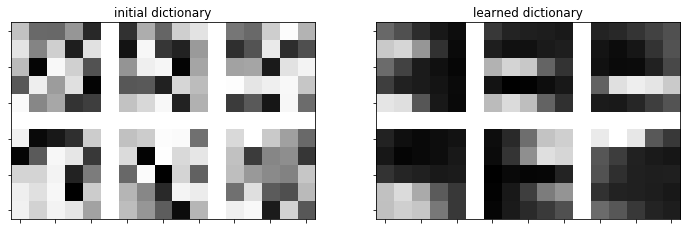

In [4]:
# 多層CSCの実行
opt = make_option();
train_data, train_label = load_mnist_train(opt["train_amount"]);
d0, D0, coef0 = nn_csc(input_ = train_data, d_size = opt['d_size'][0], lmbda = opt['lmbda'][0], Iter = opt['Iter'][0], visualize = True);
d1, D1, coef1 = nn_csc(input_ = coef0.squeeze().transpose(0,1,3,2) , d_size = opt['d_size'][1], lmbda = opt['lmbda'][1], Iter = opt['Iter'][1], visualize = False);
# output(opt, D0, coef0, D1, coef1);

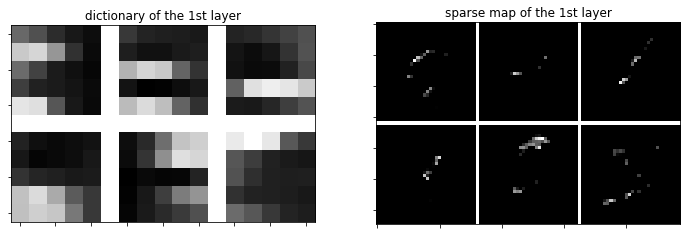

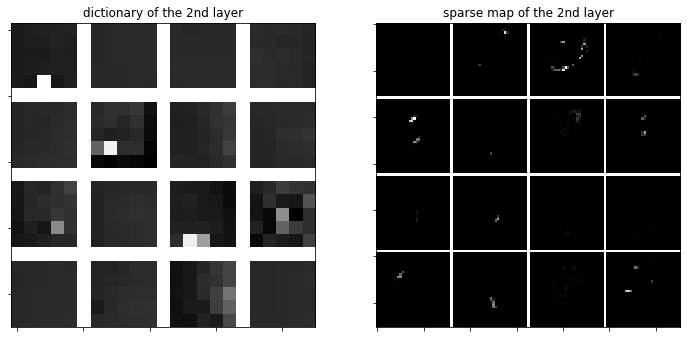

In [21]:
plot_2([util.tiledict(D0.squeeze()), util.tiledict(coef0.squeeze()[0, :, :, :])], ["dictionary of the 1st layer", "sparse map of the 1st layer"]);
plot_2([util.tiledict(D1.squeeze()[:, :, 0, :]), util.tiledict(coef1.squeeze()[0, :, :, :])], ["dictionary of the 2nd layer", "sparse map of the 2nd layer"])